# Analysis of Mouse Brain Spatial Data

In [1]:
import stt as st
import scanpy as sc
import anndata
import scvelo as scv
import gseapy as gp
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib as mpl
from adjustText import adjust_text

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.6.
  .format(latest=latest, current=current), category=UserWarning)


The processed data could be download [here](https://drive.google.com/file/d/1c53v1xo0wPd_2O7Zkfz1SWYsrv6e5bUC/view?usp=drive_link)

In [2]:
data_dir = '../data/'
adata = sc.read_h5ad(data_dir+'mousebrain_bin60_clustered.h5ad')

In [3]:
sc.pp.highly_variable_genes(adata, flavor='seurat_v3', n_top_genes=2000)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  UserWarning,


In [4]:
scv.pp.moments(adata)

Normalized count data: spliced, unspliced.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [13]:
del adata.uns['louvain_colors']
del adata.uns['scc_colors']
del adata.uns['scc_anno_colors']

In [5]:
adata.obs['attractor']= adata.obs['scc'].values

adata_aggr = st.tl.dynamical_iteration(adata,n_states = 15, n_iter = 15, return_aggr_obj=True, weight_connectivities = 0.5,n_components = 21, n_neighbors = 70,thresh_ms_gene = 0.2, use_spatial = True,spa_weight = 0.3, thresh_entropy = 0.1)    


  0%|          | 0/7765 [00:00<?, ?cell/s]

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.15, mode=deterministic, seed=29399, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=False, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    1.295747
0.25    1.877614
0.50    2.024336
0.75    2.199180
1.00    2.584817
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.28, mode=deterministic, seed=52124, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=False, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))


[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors
[0]PETSC ERROR: configure using --with-debugging=yes,


Quantiles for entropy relative difference with last iteration:
0.00    0.000019
0.25    0.063966
0.50    0.123981
0.75    0.185203
1.00    0.352620
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000044
0.25    0.139285
0.50    0.250114
0.75    0.353212
1.00    0.621466
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: [0]PETSC ERROR: ------------------------------------------------------------------------


  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.31, mode=deterministic, seed=22864, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=False, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00    0.000009
0.25    0.015028
0.50    0.032370
0.75    0.057596
1.00    0.285407
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000020
0.25    0.034534
0.50    0.073796
0.75    0.130511
1.00    0.559144
dtype: float64

Quantiles for entropy absolute difference with last iteration:
Entropy difference is below the threshold, exiting the loop.


/mnt/d/OneDrive/文档/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:346: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


In [12]:
del adata.uns['r2_keep_train']
del adata.uns['r2_keep_test']
adata.write_h5ad(data_dir+'mousebrain_bin60_results_att5_spa3.h5ad')
adata_aggr.write_h5ad(data_dir+'mousebrain_bin60_results_att5_spa3_aggr.h5ad')


TypeError: Can't implicitly convert non-string objects to strings

Above error raised while writing key 'louvain_colors' of <class 'h5py._hl.group.Group'> to /

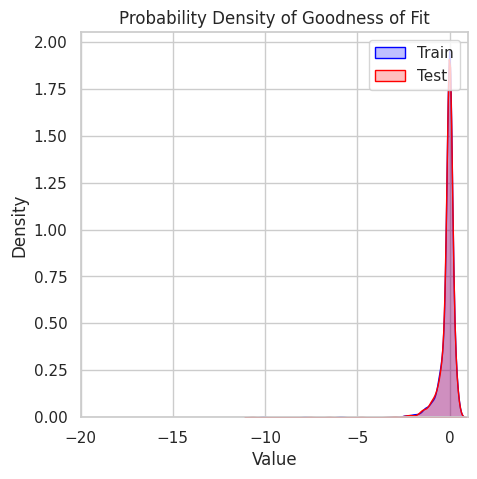

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = adata.var
# Assuming 'df' is your DataFrame and 'column1' and 'column2' are the columns you want to plot
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(5, 5))

# KDE plot for column1
sns.kdeplot(df['r2_train'], color="blue", shade=True, label='Train')

# KDE plot for column2
sns.kdeplot(df['r2_test'], color="red", shade=True, label='Test')

# Add title and labels
plt.title('Probability Density of Goodness of Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim([-20,1])
# Show the legend
plt.legend()

# Display the plot
plt.show()


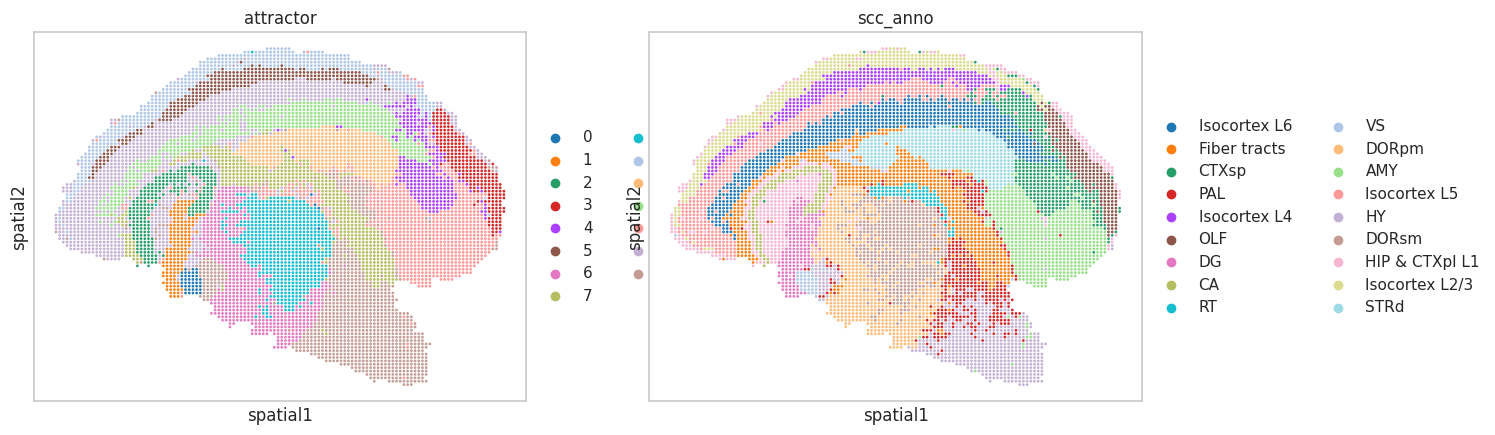

In [8]:
sc.pl.embedding(adata, basis="spatial", color=["attractor",'scc_anno'])

In [10]:
adata_aggr

AnnData object with n_obs × n_vars = 7765 × 194
    obs: 'entropy', 'attractor', 'speed'
    var: 'highly_variable'
    uns: 'pca', 'neighbors', 'T_fwd_params', 'eig_fwd', 'gene_subset'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'velocity', 'spliced', 'Ms'
    obsp: 'distances', 'connectivities', 'T_fwd'

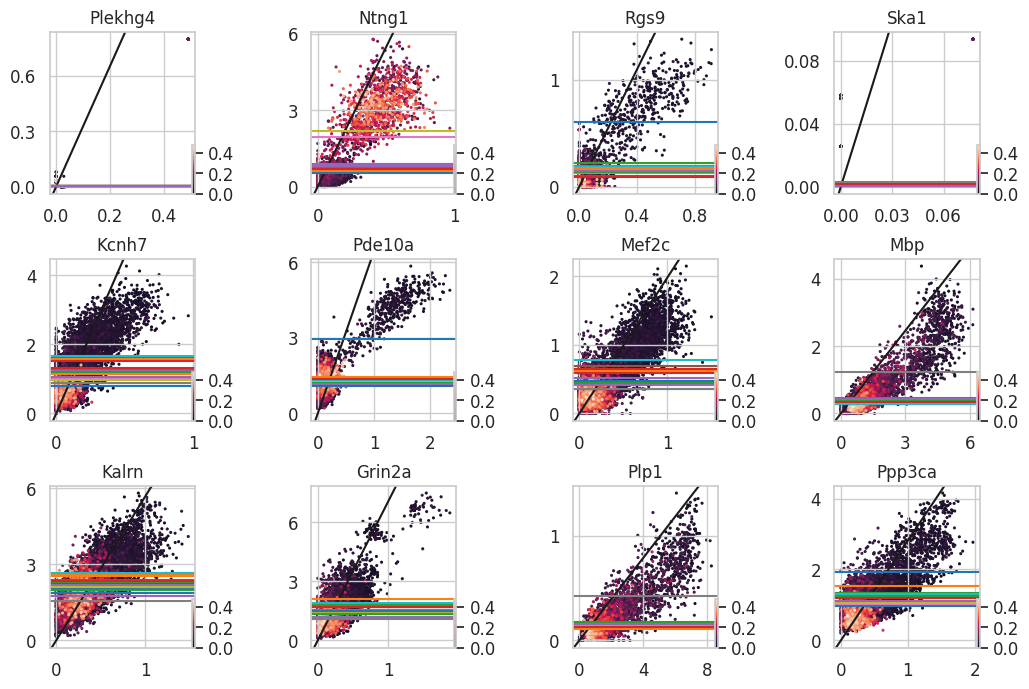

In [9]:
st.pl.plot_top_genes(adata, top_genes = 12, ncols =4, wspace = 0.8, hspace = 0.4, figsize = (12,8),color='membership',attractor=6)

In [4]:
data_dir = '../data/'
adata = sc.read_h5ad(data_dir+'mousebrain_bin60_results_att5_spa3.h5ad')
adata_aggr = sc.read_h5ad(data_dir+'mousebrain_bin60_results_att5_spa3_aggr.h5ad')

In [14]:
sc.set_figure_params(dpi=600,fontsize = 12)
mpl.rcParams['axes.grid'] = False
adata_aggr.obsm['X_spatial']=adata.obsm['X_spatial']
adata_aggr.obsm['X_spatial_aggr']=adata.obsm['X_spatial']
adata.obsm['X_spatial_aggr'] = adata.obsm['X_spatial']
st.pl.plot_tensor(adata, adata_aggr, basis = 'spatial', list_attractor = [1,2,14],filter_cells = True, member_thresh = 0.1)

View of AnnData object with n_obs × n_vars = 7765 × 97
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'gene_subset', 'attractor_colors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'
check that the input includes aggregated object
computing velocity graph (using 32/32 cores)


  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:03) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_spatial', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 97
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'gene_subset', 'attractor_colors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'
check that the input includes ag

  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:04) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_spatial', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 97
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'gene_subset', 'attractor_colors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'
check that the input includes ag

  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_spatial', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 97
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'gene_subset', 'attractor_colors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'
computing velocity graph (using 

  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:04) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_spatial_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 7765 × 97
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'gene_subset', 'attractor_colors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho', 'X_spatial_aggr'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'
computing velocity graph (u

  0%|          | 0/7765 [00:00<?, ?cells/s]

: 

View of AnnData object with n_obs × n_vars = 7765 × 91
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno', 'attractor', 'entropy', 'speed'
    var: 'pass_basic_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'r2_train', 'r2_test'
    uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'spatial', 'spatial_neighbors', 'hvg', 'da_out', 'par', 'r2_keep_train', 'r2_keep_test', 'gene_subset', 'attractor_colors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial', 'tensor_v', 'tensor_v_aver', 'rho'
    layers: 'count', 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'
check that the input includes aggregated object
computing velocity graph (using 32/32 cores)


  0%|          | 0/7765 [00:00<?, ?cells/s]

/home/cliffzhou/miniconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)


KeyError: 'X_spatial'

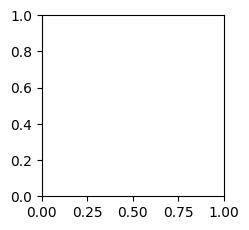

In [ ]:

st.pl.plot_tensor(adata, adata_aggr, basis = 'spatial', list_attractor = [3,4,5],filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [6,7],filter_cells = True, member_thresh = 0.1)

In [ ]:
sc.set_figure_params(dpi=600,fontsize = 12)
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = 2,filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = 1,filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'umap', state = 'unspliced',attractor = 1,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'umap', state = 'unspliced',attractor = 2,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'spliced',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'unspliced',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
sc.pl.violin(adata, keys = ['entropy'], groupby='attractor')

In [ ]:
st.construct_landscape(adata, coord_key = 'xy_loc')

In [ ]:
sc.set_figure_params(dpi=600,figsize = (6,6) ,fontsize = 10)
st.infer_lineage(adata,si=0,sf=2, method = 'MPPT',flux_fraction=0.6)

In [ ]:
%matplotlib inline
sc.set_figure_params(dpi=600,figsize = (4,4) ,fontsize = 10)
st.plot_landscape(adata, dim = 3, elev=57, azim = 167,size_point = 8)

In [ ]:
ms_genes = adata.uns['gene_subset']
adata.uns['gene_subset'] = [x for x in ms_genes if x.startswith('Wnt')]
adata_aggr.uns['gene_subset'] = [x for x in ms_genes if x.startswith('Wnt')]

In [ ]:
st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [3,4,5],filter_cells = True, member_thresh = 0.1)

## Pathway Analysis

In [ ]:
pathway = gp.parser.download_library(name = 'KEGG_2019_Mouse')

In [ ]:
tpm_dict = {}
pathway_select = {}
temp = []
for key in pathway.keys():
    gene_list = [x.capitalize() for x in pathway[key]] 
    gene_select = [x for x in gene_list if x in adata_aggr.var_names]
    if len(gene_select)>2 and gene_select not in temp:
            scv.tl.velocity_graph(adata, vkey = 'vj', xkey = 'Ms', gene_subset = gene_select ,n_jobs = -1)
            tpm_dict[key] = adata.uns['vj_graph'].toarray().reshape(-1)
            pathway_select[key] = gene_select
            temp.append(gene_select)

In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a pandas DataFrame from the dictionary
arr = np.stack(list(tpm_dict.values()))
cor = np.corrcoef(arr)

In [ ]:
pca = PCA(n_components=10)
pca_embedding = pca.fit_transform(cor)

# Perform UMAP on the PCA embedding
umap_reducer = umap.UMAP()
umap_embedding = umap_reducer.fit_transform(pca_embedding)

In [ ]:
# Perform hierarchical clustering
linked = linkage(cor, method='ward')

# Define the distance threshold or desired number of clusters
# Here, we'll use a distance threshold of 1.5
threshold = 1.5

# Get clustering labels as a NumPy array
c_labels = fcluster(linked, threshold, criterion='distance')

In [ ]:

# Sample data
x = umap_embedding[:, 0]
y = umap_embedding[:, 1]
labels = tpm_dict.keys()

# Create the scatter plot
fig, ax = plt.subplots()

num_clusters = max(c_labels)
cmap = plt.cm.get_cmap('Set2', num_clusters)

# Map the labels to colors using the colormap
colors = cmap((c_labels - 1) / (num_clusters - 1))

# Plot the scatter plot with colors based on the labels
sc = plt.scatter(x, y, c=colors)

# Remove the square outline
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)


arrow_properties = dict(
    arrowstyle='->',  # Simple arrow with a head
    color='red',      # Arrow color
    linewidth=0.5,    # Arrow line width
    alpha=0.8,         # Arrow transparency     
    mutation_scale=5 
)
# Annotate points with labels
texts = []
for i, txt in enumerate(labels):
    texts.append(ax.annotate(txt, (x[i], y[i]), fontsize=8))
    
# Adjust the annotation positions to avoid overlaps
adjust_text(texts,arrowprops=arrow_properties)

# Hide axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Hide axis labels (tick labels)
plt.xlabel('Embedding 1')
plt.ylabel('Embedding 2')

# Display the plot
plt.show()


In [ ]:
subset = pathway_select['TGF-beta signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['Wnt signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['MAPK signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['Hippo signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')